In [2]:
import sys
import os

current_dir = os.path.dirname(os.path.abspath(''))
others_path = os.path.join(current_dir, '..', 'gpr')

others_path = os.path.abspath(others_path)
if others_path not in sys.path:
    sys.path.append(others_path)
                    
import numpy as np
from matplotlib import pyplot as plt
import pickle


from pathlib import Path
notebook_dir = Path.cwd()

In [3]:
pickle_path = notebook_dir.parent / 'marginalisation/eos_extension.pickle'
with open(pickle_path, 'rb') as f:
    eos_extension = pickle.load(f)

eos_extension['n'] = (eos_extension['p']+eos_extension['e'])/eos_extension['mu']


In [4]:
eos_extension.keys()

Index(['phi', 'cs2', 'mu', 'e', 'p', 'n'], dtype='object')

In [5]:
eos_extension["cs2"].shape[0]

10000

In [6]:
start = 0
stop = -1

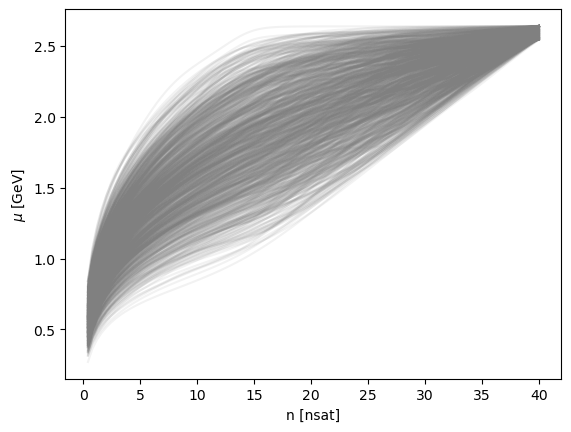

In [7]:
for c in range (0, 1000):
    plt.plot(eos_extension["n"][c][start:stop]/0.16, eos_extension["mu"][c][start:stop], color = 'gray', alpha=0.1)
plt.xlabel("n [nsat]")
plt.ylabel(r"$\mu$ [GeV]")
plt.show()

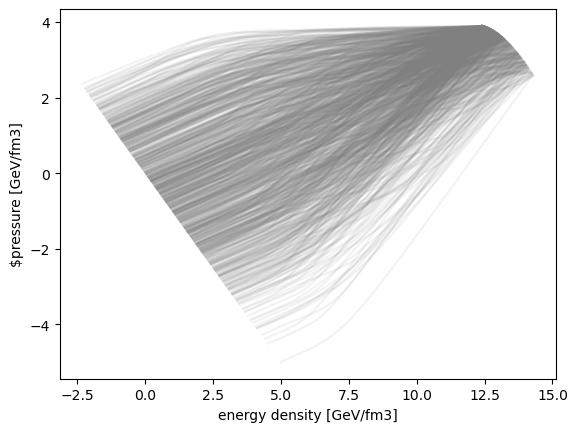

In [9]:
for c in range (0, 1000):
    plt.plot(eos_extension["e"][c][start:stop], eos_extension["p"][c][start:stop], color = 'gray', alpha=0.1)
plt.xlabel("energy density [GeV/fm3]")
plt.ylabel("$pressure [GeV/fm3]")
plt.show()

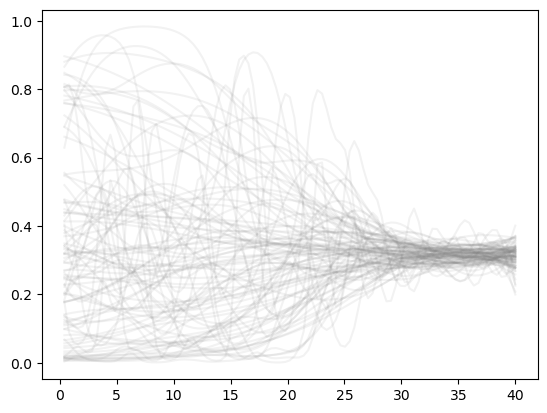

In [8]:
for c in range (0, 100):
    plt.plot(eos_extension["n"][c][::-1]/0.16, eos_extension["cs2"][c], color = 'gray', alpha=0.1)
plt.show()

#

the thing with this is that pQCD is from the grand canonical potential, so everything is a function $\mu$

so they do not have to worry about ensuring that the gp sample, which is conditioned on cs2, to integrate up to the correct $\mu$ values

what if i do this:

generate low density eos on ch-eft until n_term

have last point be the first point in a gpr and have the rest be from pqcd

get multiple samples of the above, this is my extension

marginalise over the samples

this is different than the paper because they use a pre generated set of GPs for the marginalisation

#

In [10]:
print()